In [18]:
import pandas as pd
import numpy as np

data = pd.read_csv("houseData.csv")
data.head()


,HouseTitle,HouseAddress,Price,Bedroom,Bathroom,SizeArea,HouseType,HouseStatus,HouseYear,Owner,...,transportation,shop,playground,school,islamic_Centre,pool,sport_facility,medical_Centre,furnished,image1
0,Alyvia Residence,"Kuching, Sarawak",625000,3,3,1257,Rumah Bandar,Pegangan Pajakan,2024.0,Annie Lee,...,1,1,1,1,0,0,1,1,0,https://my1-cdn.pgimgs.com/listing/31439376/UP...
1,Andira @ Denai Alam,"Jalan Elektron U 16/89, Denai Alam, Shah Alam,...",800000,4,3,2200,Rumah Teres 2 Tingkat,Pegangan Bebas,2017.0,Mohd Yunos Bin A.Karim,...,0,1,1,1,1,0,1,1,2,https://my2-cdn.pgimgs.com/listing/34692503/UP...
2,Apartmen Arena Shamelin,"Jalan 3/91 Taman Shamelin Perkasa, Cheras, Kua...",390000,3,2,1024,Pangsapuri,Pegangan Bebas,NaN,Belle Fong,...,1,1,1,1,1,0,0,1,2,https://my2-cdn.pgimgs.com/listing/36075262/UP...
3,Apartmen Harmoni,"Jalan PJU 10/4C Damansara Damai, Damansara Dam...",179000,3,2,650,Pangsapuri,Pegangan Bebas,NaN,Yannie Wong,...,1,1,0,1,1,0,0,1,2,https://my2-cdn.pgimgs.com/listing/34644859/UP...
4,"Apartment AC4 Taman Sri Sentosa , Jalan Klang ...","Old Klang Road (Jalan Klang Lama), Kuala Lumpur",200000,3,2,628,Pangsapuri,Pegangan Pajakan,NaN,FARAH HANIM BINTI AD SUHADAK SUHADAK,...,1,1,1,1,1,0,1,1,0,https://my2-cdn.pgimgs.com/listing/34679644/UP...


In [19]:
data.shape


(53, 21)

In [20]:
# remove irrelevant columns 
data = data.drop(['HouseTitle','HouseYear','HouseAddress','Owner','WasapNo','shop','medical_Centre','image1'],axis=1)
data.head()

,Price,Bedroom,Bathroom,SizeArea,HouseType,HouseStatus,transportation,playground,school,islamic_Centre,pool,sport_facility,furnished
0,625000,3,3,1257,Rumah Bandar,Pegangan Pajakan,1,1,1,0,0,1,0
1,800000,4,3,2200,Rumah Teres 2 Tingkat,Pegangan Bebas,0,1,1,1,0,1,2
2,390000,3,2,1024,Pangsapuri,Pegangan Bebas,1,1,1,1,0,0,2
3,179000,3,2,650,Pangsapuri,Pegangan Bebas,1,0,1,1,0,0,2
4,200000,3,2,628,Pangsapuri,Pegangan Pajakan,1,1,1,1,0,1,0


In [21]:
# check for missing data
data.isnull().sum()

Price             0
Bedroom           0
Bathroom          0
SizeArea          0
HouseType         0
HouseStatus       0
transportation    0
playground        0
school            0
islamic_Centre    0
pool              0
sport_facility    0
furnished         0
dtype: int64

In [22]:
print(data)

      Price  Bedroom  Bathroom  SizeArea                HouseType  \
0    625000        3         3      1257             Rumah Bandar   
1    800000        4         3      2200    Rumah Teres 2 Tingkat   
2    390000        3         2      1024               Pangsapuri   
3    179000        3         2       650               Pangsapuri   
4    200000        3         2       628               Pangsapuri   
5    105000        3         2       650               Pangsapuri   
6    190000        3         2       720               Pangsapuri   
7    180000        3         2       675               Pangsapuri   
8    255000        3         2       696               Pangsapuri   
9    320000        3         2       815               Pangsapuri   
10   170000        3         2       650               Pangsapuri   
11   295000        3         2       922               Pangsapuri   
12   160000        3         2       720               Pangsapuri   
13   265000        3         2    

In [23]:
import pandas as pd
import numpy as np

data.dropna(inplace=True)
print(data)

      Price  Bedroom  Bathroom  SizeArea                HouseType  \
0    625000        3         3      1257             Rumah Bandar   
1    800000        4         3      2200    Rumah Teres 2 Tingkat   
2    390000        3         2      1024               Pangsapuri   
3    179000        3         2       650               Pangsapuri   
4    200000        3         2       628               Pangsapuri   
5    105000        3         2       650               Pangsapuri   
6    190000        3         2       720               Pangsapuri   
7    180000        3         2       675               Pangsapuri   
8    255000        3         2       696               Pangsapuri   
9    320000        3         2       815               Pangsapuri   
10   170000        3         2       650               Pangsapuri   
11   295000        3         2       922               Pangsapuri   
12   160000        3         2       720               Pangsapuri   
13   265000        3         2    

In [24]:
# check for missing data
data.isnull().sum()

Price             0
Bedroom           0
Bathroom          0
SizeArea          0
HouseType         0
HouseStatus       0
transportation    0
playground        0
school            0
islamic_Centre    0
pool              0
sport_facility    0
furnished         0
dtype: int64

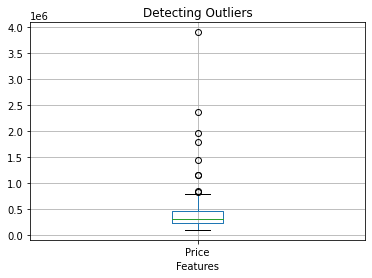

In [25]:
# use boxplot to find outliers

import matplotlib.pyplot as plt
data.boxplot(column=['Price'])
plt.title("Detecting Outliers")
plt.xlabel('Features')
plt.show()

In [26]:
# function to detect outliers in a column

def findOutliers(data,col):
    q3 = data[col].quantile(0.75)
    q1 = data[col].quantile(0.25)
    iqr = q3 - q1
    
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    
    outliersList = data.index[ (data[col] < lower_bound) | (data[col] > upper_bound)] 
    
    return outliersList

In [27]:
# find outliers in the columns

indexList = []
for col in ['Price']:
    indexList.extend(findOutliers(data,col))

In [28]:
# remove the outliers

def removeOutliers(data,outliersList):
    outliersList = sorted(set(outliersList))
    data = data.drop(outliersList)
    return data

data = removeOutliers(data,indexList)


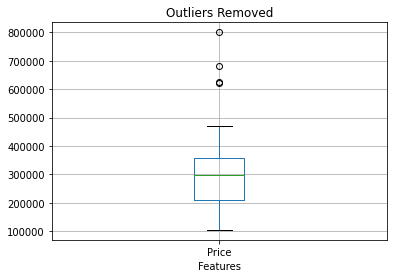

In [29]:
# check outliers

import matplotlib.pyplot as plt
data.boxplot(column=['Price'])
plt.title("Outliers Removed")
plt.xlabel('Features')
plt.show()


In [30]:
def transform_Type_of_house(x):
    if x=='Pangsapuri':
        return 1 
    elif x=='Rumah Bandar':
        return 2 
    elif x == 'Rumah Teres 1 Tingkat':
        return 3 
    elif x == 'Rumah Teres 1.5 Tingkat':
        return 4 
    elif x == 'Rumah Teres 2 Tingkat':
        return 5
    elif x == 'Rumah Teres 2.5 Tingkat':
        return 6
    elif x == 'Rumah Teres 3 Tingkat':
        return 7
    elif x == 'Rumah Banglo':
        return 8
    elif x == 'Rumah Flat':
        return 9
    elif x == 'Rumah Berkembar':
        return 10
    elif x == 'Rumah Teres':
        return 11
    elif x == 'Servis Apartment':
        return 12
    elif x == 'Dupleks':
        return 13
    elif x == 'Banglo Pautan':
        return 14
    elif x == 'Kondominium':
        return 15
    elif x == 'Rumah Kluster':
        return 16
data['HouseType'] = data['HouseType'].apply(transform_Type_of_house)

In [31]:
def transform_house_Status(x):
    if x=='Pegangan Pajakan':
        return 1 
    elif x=='Pegangan Bebas':
        return 2 
data['HouseStatus'] = data['HouseStatus'].apply(transform_house_Status)

In [32]:
data.dropna(inplace=True)
print(data.HouseType,data.HouseStatus)

0     2
1     5
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
15    5
16    5
18    1
19    1
20    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
40    1
41    1
42    1
43    3
44    1
45    1
46    1
47    1
48    1
49    1
Name: HouseType, dtype: int64 0     1.0
1     2.0
2     2.0
3     2.0
4     1.0
5     2.0
6     2.0
7     2.0
8     2.0
9     1.0
10    2.0
11    1.0
12    2.0
13    2.0
15    2.0
16    1.0
18    2.0
19    2.0
20    2.0
24    2.0
25    2.0
26    2.0
27    2.0
28    1.0
29    2.0
30    2.0
31    2.0
32    2.0
33    2.0
34    2.0
35    2.0
36    2.0
37    1.0
40    2.0
41    2.0
42    1.0
43    1.0
44    1.0
45    2.0
46    2.0
47    2.0
48    2.0
49    2.0
Name: HouseStatus, dtype: float64


Data Balancing

Feature selection

In [33]:
X = data.drop(columns="Price")
y = data["Price"]

In [34]:
# splitting dataset into testing and training dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

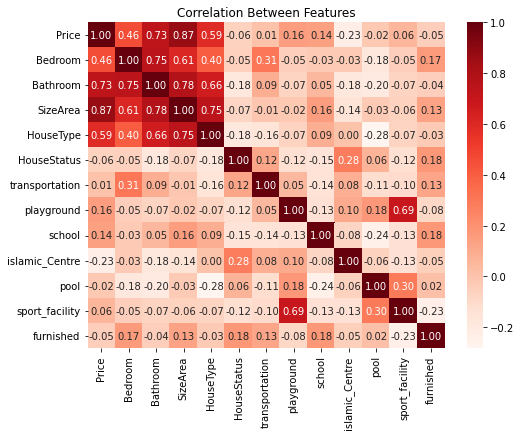

In [35]:
# Using Pearson Correlation
import seaborn as sns

plt.figure(figsize=(8,6))
cor = data.corr(method ='pearson')
sns.heatmap(cor, annot=True, fmt='.2f',cmap=plt.cm.Reds)  
plt.title("Correlation Between Features")
plt.savefig('pearsonsCorrelation.jpg',bbox_inches='tight')
plt.show()

In [36]:
#Correlation with output variable
cor_target = abs(cor["Price"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
print(relevant_features)

Price        1.000000
Bedroom      0.460429
Bathroom     0.733704
SizeArea     0.872411
HouseType    0.590347
Name: Price, dtype: float64


In [37]:
corr_vars = set()
corr_vars.update(relevant_features.index.unique(level=0))
all_vars = set(data.columns)
feature_cor = X.drop(columns=all_vars - corr_vars).columns

In [38]:
print(data)

     Price  Bedroom  Bathroom  SizeArea  HouseType  HouseStatus  \
0   625000        3         3      1257          2          1.0   
1   800000        4         3      2200          5          2.0   
2   390000        3         2      1024          1          2.0   
3   179000        3         2       650          1          2.0   
4   200000        3         2       628          1          1.0   
5   105000        3         2       650          1          2.0   
6   190000        3         2       720          1          2.0   
7   180000        3         2       675          1          2.0   
8   255000        3         2       696          1          2.0   
9   320000        3         2       815          1          1.0   
10  170000        3         2       650          1          2.0   
11  295000        3         2       922          1          1.0   
12  160000        3         2       720          1          2.0   
13  265000        3         2       773          1          2.

4.2.2 Embedded Method: Random Forest Importance

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 49
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           43 non-null     int64  
 1   Bedroom         43 non-null     int64  
 2   Bathroom        43 non-null     int64  
 3   SizeArea        43 non-null     int64  
 4   HouseType       43 non-null     int64  
 5   HouseStatus     43 non-null     float64
 6   transportation  43 non-null     int64  
 7   playground      43 non-null     int64  
 8   school          43 non-null     int64  
 9   islamic_Centre  43 non-null     int64  
 10  pool            43 non-null     int64  
 11  sport_facility  43 non-null     int64  
 12  furnished       43 non-null     int64  
dtypes: float64(1), int64(12)
memory usage: 4.7 KB


In [40]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)

SimpleImputer()

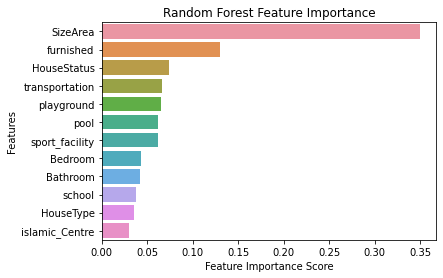

In [41]:
# embedded method: random forest feature selection
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=10)
clf.fit(X_train,y_train)

feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Random Forest Feature Importance")
plt.savefig('RandomForestFeatureImportance.jpg',bbox_inches='tight')
plt.show()

In [42]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=10)
sel = SelectFromModel(clf)
sel.fit(X_train,y_train)
sel.get_support()
feature_sel = X.columns[(sel.get_support())]

print("Selected Feature:")
for i in range (0,len(feature_sel)):
    print(i+1,'-',feature_sel[i])

Selected Feature:
1 - SizeArea
2 - furnished


LINEAR REGRESSION FEATURE IMPORTANCE

In [43]:
# compare accuracy from each feature selection method

from sklearn import metrics

clf = RandomForestClassifier(random_state=10)

# accuracy of correlation method
clf.fit(X_train[feature_cor],y_train)
y_pred = clf.predict(X_test[feature_cor])
cor_accuracy = metrics.accuracy_score(y_test,y_pred)

# accuracy of tree based feature selection (embedded method)
clf.fit(X_train[feature_sel],y_train)
y_pred = clf.predict(X_test[feature_sel])
sel_accuracy = metrics.accuracy_score(y_test,y_pred)

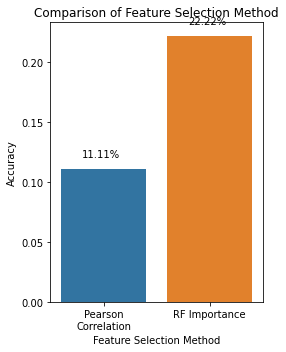

In [44]:
# plotting the comparison between the feature selection method

plt.subplots(figsize=(4,5))

method = ['Pearson\nCorrelation','RF Importance']
accuracy = [cor_accuracy,sel_accuracy]

ax = sns.barplot(x=method,y=accuracy)
ax.set_xlabel('Feature Selection Method')
ax.set_ylabel('Accuracy')
for i,v in enumerate(accuracy):
    ax.text(i - .2,v + .01,"{:.2%}".format(v))

plt.title("Comparison of Feature Selection Method")
plt.tight_layout()
plt.show()

Machine Learning training

In [45]:
# update X_train,X_test
X_train = X_train[feature_sel]
X_test = X_test[feature_sel]

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,median_absolute_error, r2_score, explained_variance_score, max_error,mean_absolute_percentage_error

def forecast_accuracy(forecast, actual):
    print("R2 Score: %.3f" % r2_score(actual, forecast))
    print("Mean Squared Error (MSE): %.3f" % mean_squared_error(actual, forecast))
    print("Root Mean Squared Error (RMSE): %.3f" % mean_squared_error(actual, forecast, squared=False))
    print("Mean Absolute Error (MAE): %.3f" % mean_absolute_error(actual, forecast))
    print("Mean Absolute Percentage Error (MAPE): %.3f" % mean_absolute_percentage_error(actual, forecast))
    print("Median Absolute Error (MAE): %.3f" % median_absolute_error(actual, forecast))
    print("Explained Variance Score: %.3f" % explained_variance_score(actual, forecast))
    print("Max Error: %.3f" % max_error(actual, forecast))

def accuracy(forecast,actual):   
    return r2_score(actual, forecast)


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=43)

from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor()
modelRF.fit(X_train, y_train)

y_pred = modelRF.predict(X_test)

print("\nRANDOM FOREST REGRESSOR\n")
forecast_accuracy(y_pred, y_test)
AccuracyRF= accuracy(y_pred,y_test)



RANDOM FOREST REGRESSOR

R2 Score: 0.812
Mean Squared Error (MSE): 2946416441.615
Root Mean Squared Error (RMSE): 54280.903
Mean Absolute Error (MAE): 45623.154
Mean Absolute Percentage Error (MAPE): 0.192
Median Absolute Error (MAE): 37850.000
Explained Variance Score: 0.819
Max Error: 92170.000


In [47]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import seaborn as sns


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

#Training SVM kenel 'linear','poly', 'rbf', 'sigmoid'
svclassifier = SVR(kernel='linear')
svclassifier.fit(X_train, y_train)

#Make prediction
y_pred = svclassifier.predict(X_test)

print("\nSV LINEAR REGRESSOR\n")
forecast_accuracy(y_pred, y_test)
AccuracySV= accuracy(y_pred,y_test)


SV LINEAR REGRESSOR

R2 Score: 0.662
Mean Squared Error (MSE): 3628233613.354
Root Mean Squared Error (RMSE): 60234.821
Mean Absolute Error (MAE): 47989.092
Mean Absolute Percentage Error (MAPE): 0.174
Median Absolute Error (MAE): 39351.915
Explained Variance Score: 0.778
Max Error: 137690.414


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from numpy import absolute


# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3)
 
# define model
modelXG = XGBRegressor()
modelXG.fit(X_train, y_train)

#Make prediction
y_pred = modelXG.predict(X_test)

print("\nXGBoost REGRESSOR\n")
forecast_accuracy(y_pred, y_test)
AccuracyXG= accuracy(y_pred,y_test)

[01:59:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBoost REGRESSOR

R2 Score: 0.112
Mean Squared Error (MSE): 9528746716.250
Root Mean Squared Error (RMSE): 97615.300
Mean Absolute Error (MAE): 80560.287
Mean Absolute Percentage Error (MAPE): 0.270
Median Absolute Error (MAE): 82778.562
Explained Variance Score: 0.252
Max Error: 209792.688


In [49]:
data.head()


,Price,Bedroom,Bathroom,SizeArea,HouseType,HouseStatus,transportation,playground,school,islamic_Centre,pool,sport_facility,furnished
0,625000,3,3,1257,2,1.0,1,1,1,0,0,1,0
1,800000,4,3,2200,5,2.0,0,1,1,1,0,1,2
2,390000,3,2,1024,1,2.0,1,1,1,1,0,0,2
3,179000,3,2,650,1,2.0,1,0,1,1,0,0,2
4,200000,3,2,628,1,1.0,1,1,1,1,0,1,0


In [50]:
model = ['Random Forest','Support Vector','XGBoost']
accuracy = [AccuracyRF, AccuracySV, AccuracyXG]


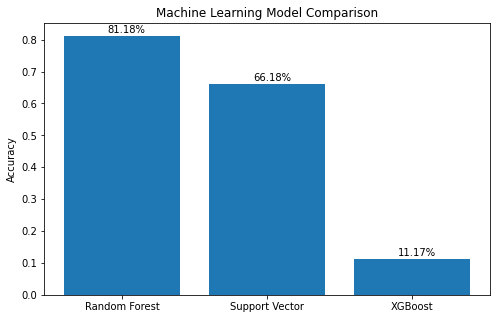

In [51]:
plt.figure(figsize=(8,5))

plt.bar(model, accuracy)
plt.title('Machine Learning Model Comparison')
plt.ylabel('Accuracy')
for i,v in enumerate(accuracy):
    plt.text(i - .1,v + .01,"{:.2%}".format(v))

plt.show()

In [52]:
# save the model to disk
import pickle

filename = 'model\predictive_model.sav'

tuple_objects = (modelXG, AccuracyXG)

# Save tuple
pickle.dump(tuple_objects, open(filename, 'wb'))